# Chapter 9: Living Crystals

<img src="LC_fig_01.jpg" alt="title" width="600px" />

## Motivation

**Living crystals**: Example of active matter.

Active matter: out-of-equilibrium. Encompasses artificial systems and living systems.

**Key advantages**:
- Simple model to mimic motile microorganisms and self-propelling particles.
- Adaptable to different experimental conditions.


### Applications

**Physics**
- Nonequilibrium statistical mechanics
- Self-assembly, self-organization

**Biology**
- Collective behaviours of motile organisms
- Motile phases

**Nanothechnology**
- Self-organization
- Motion control


## Application example: Dynamic clustering of passive colloids in dense suspensions of motile bacteria

[Dynamic clustering of passive colloids in dense suspensions of motile bacteria](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.105.054605)

<img src="LC_fig_02.png" alt="title" width="600px" />

## Active Brownian Particle

Position and orientation: $x$, $y$, $\phi$

Self-propulsion speed: $v$

Velocity: $\mathbf{v} = (v \cos{\phi}) \, \hat{\mathbf{x}} + (v \sin{\phi})\, \hat{\mathbf{y}}$

Noise: both on the position and the orientation.



**Equation of motion:**

$$
    \left\{ 
    \begin{array}{rcl}
        \displaystyle \frac{{\rm d}x(t)}{{\rm d}t}  &  =  & v \cos{\phi (t)} +\sqrt{2D_{\rm T}}\,W_x
        \\[10pt]
        \displaystyle \frac{{\rm d}y(t)}{{\rm d}t}  &  =  & v \sin{\phi (t)} +\sqrt{2D_{\rm T}}\,W_y
        \\[10pt]
        \displaystyle \frac{{\rm d}\phi(t)}{{\rm d}t} & =  & \sqrt{2D_{\rm R}}\,W_{\phi}
    \end{array}
    \right.
$$


$W_x$, $W_y$, $W_{\phi}$: independent random processes with mean 0 and standard deviation 1.

**Characteristic timescale of the rotational diffusion**

*Orientation relaxation time* $t_{r}$

$$
t_{\rm r} = D_{\rm R}^{-1}
$$


## Simulation of an active Brownian particle

Let's simulate an active Brownian particle by finite differences.


In [1]:
import math
import numpy as np 

def evolution_ABP(x0, y0, phi0, v, D, DR, dt, duration):
    """
    Function to generate the trajectory of an active Brownian particle.
    
    Parameters
    ==========
    x0, y0 : Initial position [m].
    phi0 : Initial orientation [rad].
    v : self-propulsion speed [m/s]
    D : Diffusion coefficient [m^2/s]
    DR : Rotational diffusion coefficient [1/s]
    gamma : Friction coefficient [N*s/m].    
    dt : Time step for the numerical solution [s].
    duration : Total time for which the solution is computed [s].
    """
        
    # Coefficients for the finite difference solution.
    c_noise_x = np.sqrt(2 * D * dt)
    c_noise_y = np.sqrt(2 * D * dt)
    c_noise_phi = np.sqrt(2 * DR * dt)

    N = math.ceil(duration / dt)  # Number of time steps.

    x = np.zeros(N)
    y = np.zeros(N)
    phi = np.zeros(N)

    rn = np.random.normal(0, 1, size=(3, N - 1))
    
    x[0] = x0
    y[0] = y0
    phi[0] = phi0

    for i in range(N - 1):
        x[i + 1] = x[i] + v * dt * np.cos(phi[i]) + c_noise_x * rn[0, i]
        y[i + 1] = y[i] + v * dt * np.sin(phi[i]) + c_noise_y * rn[1, i]
        phi[i + 1] = phi[i] + c_noise_phi * rn[2, i]

    return x, y, phi

In [2]:
# Simulation of an active Brownian colloid in water at room temperature.

R = 1e-6  # Radius of the Brownian particle [m].
eta = 1e-3  # Viscosity of the medium.
gamma = 6 * np.pi * R * eta  # Drag coefficient. 
gammaR = 8 * np.pi * R ** 3 * eta  # Rotational drag coefficient. 
kBT = 4.11e-21  # kB*T at room temperature [J].
D = kBT / gamma  # Diffusion constant [m^2 / s].
DR = kBT / gammaR  # Rotational diffusion constant [1 / s].
t_r = 1 / DR  # Orientation relaxation time.
dt = 1e-3  # Time step [s].
duration = 10  # Total time [s].

# Try: v = 0, 1e-6
v = 0.1e-6  # Self-propulsion speed [m/s].

print(f't_r={t_r:.3f} s')

x0 = 0  # Initial position [m].
y0 = 0  # Initial position [m].
phi0 = 0  # Initial orientation [rad].

x, y, phi = evolution_ABP(x0, y0, phi0, v, D, DR, dt, duration)

t = dt * np.arange(math.ceil(duration / dt))

t_r=6.115 s


Let's plot the trajectory in the Cartesian plane.

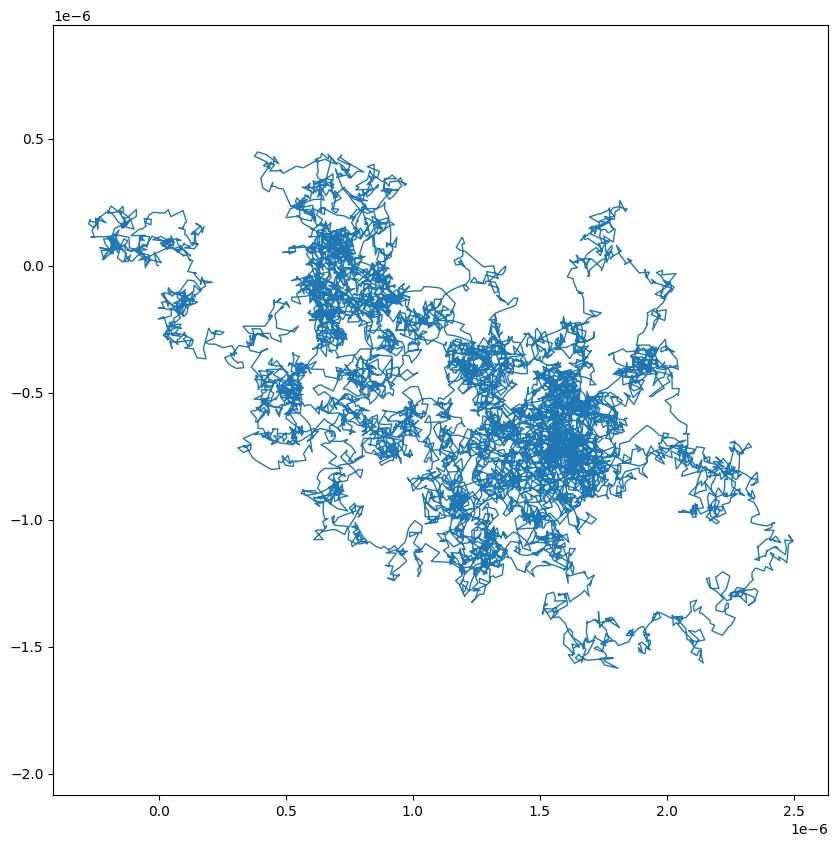

In [3]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(x, y, '-', linewidth=1 )
plt.axis('equal')
plt.show()       


Let's compare trajectories generated with different values of the self-propulsion speed $v$.
We use the same noise for all trajectories.

In [4]:
# Simulation of an active Brownian colloid in water at room temperature.

R = 1e-6  # Radius of the Brownian particle [m].
eta = 1e-3  # Viscosity of the medium.
gamma = 6 * np.pi * R * eta  # Drag coefficient. 
gammaR = 8 * np.pi * R ** 3 * eta  # Rotational drag coefficient. 
kBT = 4.11e-21  # kB*T at room temperature [J].
D = kBT / gamma  # Diffusion constant [m^2 / s].
DR = kBT / gammaR  # Rotational diffusion constant [1 / s].
t_r = 1 / DR  # Orientation relaxation time.
dt = 2e-2  # Time step [s].
duration = 10000  # Total time [s].

# Try: v = 0, 1e-6
v_list = np.array([0e-6, 1e-6, 2e-6, 3e-6])  # Self-propulsion speed [m/s].
N_traj = np.size(v_list)

print(f't_r={t_r:.3f} s')

x0 = 0  # Initial position [m].
y0 = 0  # Initial position [m].
phi0 = 0  # Initial orientation [rad].

# Coefficients for the finite difference solution.
c_noise_x = np.sqrt(2 * D * dt)
c_noise_y = np.sqrt(2 * D * dt)
c_noise_phi = np.sqrt(2 * DR * dt)

N = math.ceil(duration / dt)  # Number of time steps.

x = np.zeros([N_traj, N])
y = np.zeros([N_traj, N])
phi = np.zeros([N_traj, N])

rn = np.random.normal(0, 1, size=(3, N - 1))
    
for j in range(N_traj):
    x[j, 0] = x0
    y[j, 0] = y0
    phi[j, 0] = phi0

for i in range(N - 1):
    for j in range(N_traj):
        x[j, i + 1] = x[j, i] + v_list[j] * dt * np.cos(phi[j, i]) + c_noise_x * rn[0, i]
        y[j, i + 1] = y[j, i] + v_list[j] * dt * np.sin(phi[j, i]) + c_noise_y * rn[1, i]
        phi[j, i + 1] = phi[j, i] + c_noise_phi * rn[2, i]

t = dt * np.arange(math.ceil(duration / dt))

t_r=6.115 s


Plot the trajectories.

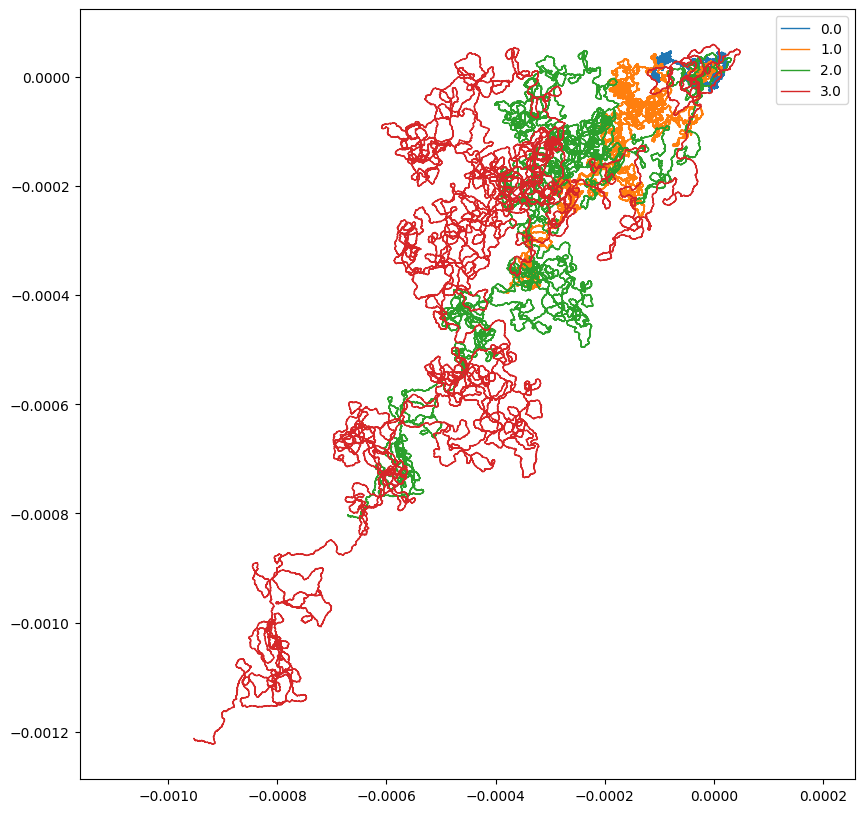

In [5]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
for j in range(N_traj):
    plt.plot(x[j, :], y[j, :], '-', linewidth=1, label=str(v_list[j] * 1e+6) )
plt.axis('equal')
plt.legend()
plt.show()

## MSD of an active Brownian particle

**MSD (recap)**

*Ensemble average*

$$
    \mathrm{MSD}(t)
    = 
    \langle 
        [x(t+\tau)-x(\tau)]^2 
        + 
        [y(t+\tau)-y(\tau)]^2 
    \rangle,
$$

*Time average*

$$
    \mathrm{MSD}(t)
    = \frac{1}{n}
    \sum_{i=1}^n
    \langle 
        [x(t+\tau_i)-x(\tau_i)]^2 
        + 
        [y(t+\tau_i)-y(\tau_i)]^2 
    \rangle.
$$

**Theoretical dependence of MSD for an active Brownian particle**

$$
    \mathrm{MSD}(t) = \left( 4 D_{\rm T} + 2v^{2} t_{\rm r}    \right) t + 2v^{2} t_{\rm r}^{2}  \left( e^{-t/t_{\rm r}} -1 \right),
$$

The characteristic timescale of the rotational diffusion $t_r$ is a *threshold* that separates the superdiffusive (ballistic) regime at shorter time intervals and the enhaced diffusive regime at larger time intervals.

**MSD for $t \ll t_{r}$**: MSD $\propto v^2t^2$


**MSD for $t \gg t_{r}$**: MSD $\propto t$

*Effective diffusion coefficient*: $D_{\rm eff}=D_{\rm T} + v^2t_r/2$





Function to implement MSD in 2D

In [6]:
def MSD_2d(x, y, n_delays):
    """
    Function to calculate the MSD.
    
    Parameters
    ==========
    x : Trajectory (x component).
    y : Trajectory (y component).
    n_delays : Indicates the delays to be used to calculate the MSD.
    """
    L = np.size(n_delays)
    msd = np.zeros(L)
    
    nelem = np.size(x)
    
    for i in range(L):
        n = n_delays[i]
        Nmax = nelem - n
        dx = x[n:nelem] -  x[0: Nmax]
        dy = y[n:nelem] -  y[0: Nmax]
        msd[i] += np.mean(dx ** 2 + dy ** 2)

    return msd

Now calculate the MSD for the generated trajectories.

In [7]:
# n_delays = np.array(range(N))  # This is very slow.

# Select the delays to be equally spaced on a logarithmic scale.
# This way the calculation is faster.
# Precision is maintained.
n_delays = 2 ** np.array(np.arange(np.floor(np.log(N) / np.log(2))))

MSD = np.zeros([N_traj, np.size(n_delays)])  # MSD for each trajectory.
t_delay = n_delays * dt  # Time delay.

for i in range(N_traj):
    # print(f'i={i} of {N_traj - 1}')
    MSD[i, :] = MSD_2d(x[i, :], y[i, :], n_delays.astype(int))
    

Plot the MSD

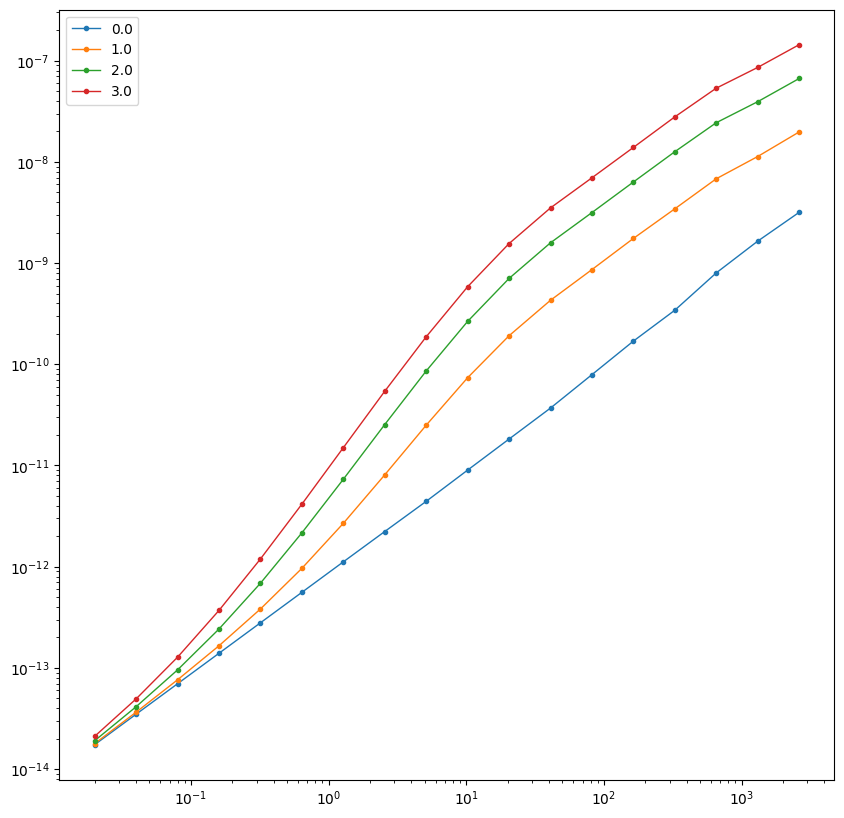

In [8]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 10))
for j in range(N_traj):
    plt.loglog(t_delay, MSD[j, :], '.-', linewidth=1, label=str(v_list[j] * 1e+6) )
plt.legend()
plt.show()       

## Living crystals

Many active Brownian particles (with a finite radius $R$) interacting with contact interaction (hard core repulsion: they cannot overlap) and a phoretic attraction. 

**Arena**: square $L \times L$ (same as in the Vicsek model).

We use *periodic boundary conditions*.

In [9]:
def replicas(x, y, L):
    """
    Function to generate replicas of a single particle.
    
    Parameters
    ==========
    x, y : Position.
    L : Side of the squared arena.
    """    
    xr = np.zeros(9)
    yr = np.zeros(9)

    for i in range(3):
        for j in range(3):
            xr[3 * i + j] = x + (j - 1) * L
            yr[3 * i + j] = y + (i - 1) * L
    
    return xr, yr

In [10]:
def pbc(x, y, L):
    """
    Function to enforce periodic boundary conditions on the positions.
    
    Parameters
    ==========
    x, y : Position.
    L : Side of the squared arena.
    """   
    
    outside_left = np.where(x < - L / 2)[0]
    x[outside_left] = x[outside_left] + L

    outside_right = np.where(x > L / 2)[0]
    x[outside_right] = x[outside_right] - L

    outside_up = np.where(y > L / 2)[0]
    y[outside_up] = y[outside_up] - L

    outside_down = np.where(y < - L / 2)[0]
    y[outside_down] = y[outside_down] + L
    
    return x, y

### Hard core repulsion

Implemented with the volume exclusion method, pictured below.

<img src="LC_fig_03.png" alt="title" width="600px" />

In [11]:
def remove_overlap(x, y, R, L, dl, N_max_iter):
    """
    Function to remove the overlap between particles.
    Use the volume exclusion methods.
    If N_max_iter iterations are reached, then it stops.
    
    Parameters
    ==========
    x, y : Positions.
    R : Particle radius.
    L : Dimension of the squared arena.
    dl : Tolerance on the overlap. Must be much smaller than R.
    N_max_iter : stops if the number of iterations is larger than this.
    """

    N_part = np.size(x)
    step = 0
    running = True
    
    while running:
        
        n_overlaps = 0
        
        for i in np.arange(N_part):
            for j in np.arange(i + 1, N_part):                
                # Check overlap.
                dx = x[j] - x[i]
                dy = y[j] - y[i]
                dist = np.sqrt(dx ** 2 + dy ** 2)
                
                if dist < 2 * R - dl:
                    n_overlaps += 1  # Increment overlap counter.
                    # Remove overlap.
                    xm = 0.5 * (x[j] + x[i]) 
                    ym = 0.5 * (y[j] + y[i]) 
                    x[i] = xm - dx / dist * R
                    y[i] = ym - dy / dist * R
                    x[j] = xm + dx / dist * R
                    y[j] = ym + dy / dist * R
                
        step += 1
        
        if (step >= N_max_iter) or (n_overlaps == 0):
            running = False
    
    x, y = pbc(x, y, L)  # Apply periodic boundary conditions.

    return x, y     


### Phoretic attraction

Induces a phoretic velocity $v_{\rm p}$

$$
    v_{\rm p}(r) = v_{\rm 0}\ \frac{R^2}{r^2},
$$

To speed up calculations, we use a cut-off radius $r_{c}$

<img src="LC_fig_04.png" alt="title" width="600px" />

In [12]:
from functools import reduce

def phoretic_velocity(x, y, R, v0, r_c, L):
    """
    Function to calculate the phoretic velocity.
    
    Parameters
    ==========
    x, y : Positions.
    R : Particle radius.
    v0 : Phoretic reference velocity.
    r_c : Cut-off radius.
    L : Dimension of the squared arena.
    """
    
    N = np.size(x)

    vx = np.zeros(N)  # Phoretic velocity (x component).
    vy = np.zeros(N)  # Phoretic velocity (y component).
    
    # Preselect what particles are closer than r_c to the boundaries.
    replicas_needed = reduce( 
        np.union1d, (
            np.where(y + r_c > L / 2)[0], 
            np.where(y - r_c < - L / 2)[0],
            np.where(x + r_c > L / 2)[0],
            np.where(x - r_c > - L / 2)[0]
        )
    )

    for j in range(N - 1):   
        
        # Check if replicas are needed to find the interacting neighbours.
        if np.size(np.where(replicas_needed == j)[0]):
            # Use replicas.
            xr, yr = replicas(x[j], y[j], L)
            for nr in range(9):
                dist2 = (x[j + 1:] - xr[nr]) ** 2 + (y[j + 1:] - yr[nr]) ** 2 
                nn = np.where(dist2 <= r_c ** 2)[0] + j + 1
                
                # The list of nearest neighbours is set.
                # Contains only the particles with index > j
        
                if np.size(nn) > 0:
                    nn = nn.astype(int)
        
                    # Find interaction
                    dx = x[nn] - xr[nr]
                    dy = y[nn] - yr[nr]
                    dist = np.sqrt(dx ** 2 + dy ** 2)
                    v_p = v0 * R ** 2 / dist ** 2
                    dvx = dx / dist * v_p
                    dvy = dy / dist * v_p
            
                    # Contribution for particle j.
                    vx[j] += np.sum(dvx)
                    vy[j] += np.sum(dvy)

                    # Contribution for nn of particle j nr replica.
                    vx[nn] -= dvx
                    vy[nn] -= dvy
                
        else:
            dist2 = (x[j + 1:] - x[j]) ** 2 + (y[j + 1:] - y[j]) ** 2 
            nn = np.where(dist2 <= r_c ** 2)[0] + j + 1
        
            # The list of nearest neighbours is set.
            # Contains only the particles with index > j
        
            if np.size(nn) > 0:
                nn = nn.astype(int)
        
                # Find interaction
                dx = x[nn] - x[j]
                dy = y[nn] - y[j]
                dist = np.sqrt(dx ** 2 + dy ** 2)
                v_p = v0 * R ** 2 / dist ** 2
                dvx = dx / dist * v_p
                dvy = dy / dist * v_p
            
                # Contribution for particle j.
                vx[j] += np.sum(dvx)
                vy[j] += np.sum(dvy)

                # Contribution for nn of particle j.
                vx[nn] -= dvx
                vy[nn] -= dvy
                   
    return vx, vy


### Simulation 

Initialization of the system

In [13]:
N_part = 200  # Number of active Brownian particles.

R = 1e-6  # Radius of the Brownian particle [m].
eta = 1e-3  # Viscosity of the medium.
gamma = 6 * np.pi * R * eta  # Drag coefficient. 
gammaR = 8 * np.pi * R ** 3 * eta  # Rotational drag coefficient. 
kBT = 4.11e-21  # kB*T at room temperature [J].
D = kBT / gamma  # Diffusion constant [m^2 / s].
DR = kBT / gammaR  # Rotational diffusion constant [1 / s].
t_r = 1 / DR  # Orientation relaxation time.
dt = 4e-2  # Time step [s].

v = 5e-6  # Self-propulsion speed [m/s].

v0 = 20e-6  # Phoretic reference speed [m/s].
r_c = 10 * R  # Cut-off radius [m].

L = 100 * R  # Side of the arena.

print(f't_r={t_r:.3f} s')

# Initialization.

# Random position.
x = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]
y = (np.random.rand(N_part) - 0.5) * L  # in [-L/2, L/2]

# Random orientation.
phi = 2 * (np.random.rand(N_part) - 0.5) * np.pi  # in [-pi, pi]

# Coefficients for the finite difference solution.
c_noise_x = np.sqrt(2 * D * dt)
c_noise_y = np.sqrt(2 * D * dt)
c_noise_phi = np.sqrt(2 * DR * dt)


t_r=6.115 s


Simulation (animated) 

In [14]:
import time
from scipy.constants import Boltzmann as kB 
from tkinter import *

window_size = 600

vp = 2 * R  # Length of the arrow indicating the velocity direction.
line_width = 1  # Width of the arrow line.

N_skip = 1

tk = Tk()
tk.geometry(f'{window_size + 20}x{window_size + 20}')
tk.configure(background='#000000')

canvas = Canvas(tk, background='#ECECEC')  # Generate animation window 
tk.attributes('-topmost', 0)
canvas.place(x=10, y=10, height=window_size, width=window_size)

particles = []
for j in range(N_part):
    particles.append(
        canvas.create_oval(
            (x[j] - R) / L * window_size + window_size / 2, 
            (y[j] - R) / L * window_size + window_size / 2,
            (x[j] + R) / L * window_size + window_size / 2, 
            (y[j] + R) / L * window_size + window_size / 2,
            outline='#808080', 
            fill='#808080',
        )
    )

velocities = []
for j in range(N_part):
    velocities.append(
        canvas.create_line(
            x[j] / L * window_size + window_size / 2, 
            y[j] / L * window_size + window_size / 2,
            (x[j] + vp * np.cos(phi[j])) / L * window_size + window_size / 2, 
            (y[j] + vp * np.cos(phi[j])) / L * window_size + window_size / 2,
            width=line_width
        )
    )

step = 0

def stop_loop(event):
    global running
    running = False
tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
running = True  # Flag to control the loop.
while running:
    
    # Calculate phoretic velocity.
    vp_x, vp_y = phoretic_velocity(x, y, R, v0, r_c, L)
       
    # Calculate new positions and orientations.
    nx = x + (v * np.cos(phi) + vp_x) * dt + c_noise_x * np.random.normal(0, 1, N_part)
    ny = y + (v * np.sin(phi) + vp_y) * dt + c_noise_y * np.random.normal(0, 1, N_part)
    nphi = phi + c_noise_phi * np.random.normal(0, 1, N_part)

    # Apply pbc.
    nx, ny = pbc(nx, ny, L)
    
    # Remove overlap.
    nx, ny = remove_overlap(nx, ny, R, L, dl=1e-8, N_max_iter=20)
    
    # Reflecting boundary conditions.
    nx, ny = pbc(nx, ny, L)
        
    # Update animation frame.
    if step % N_skip == 0:        
        for j, particle in enumerate(particles):
            canvas.coords(
                particle,
                (nx[j] - R) / L * window_size + window_size / 2,
                (ny[j] - R) / L * window_size + window_size / 2,
                (nx[j] + R) / L * window_size + window_size / 2,
                (ny[j] + R) / L * window_size + window_size / 2,
            )
                    
        for j, velocity in enumerate(velocities):
            canvas.coords(
                velocity,
                nx[j] / L * window_size + window_size / 2,
                ny[j] / L * window_size + window_size / 2,
                (nx[j] + vp * np.cos(nphi[j])) / L * window_size + window_size / 2,
                (ny[j] + vp * np.sin(nphi[j])) / L * window_size + window_size / 2,
            )
                    
        tk.title(f'Time {step * dt:.1f} - Iteration {step}')
        tk.update_idletasks()
        tk.update()
        time.sleep(.001)  # Increase to slow down the simulation.    

    step += 1
    x[:] = nx[:]
    y[:] = ny[:]
    phi[:] = nphi[:]  

tk.update_idletasks()
tk.update()
tk.mainloop()  # Release animation handle (close window to finish).